In [1]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [4]:
selected_cell = 'SAMs'

In [5]:
estimation = pd.read_csv('TCGA-LIHC.Immune.csv',index_col=0)
estimation.head()

,Other,Kupffer cells,TM1,SAMs,T cells,cDC2,cDC1,B cells,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,
TCGA-FV-A495-01,0.766988,0.023547,0.006748,0.148337,0.005788,0.019714,0.017748,0.011130,0,0.863320,0.512318
TCGA-G3-A3CH-11,0.865737,0.033286,0.008331,0.032900,0.003808,0.052007,0.003931,0.000000,0,0.917988,0.408080
TCGA-CC-A3MB-01,0.719061,0.009895,0.013096,0.100181,0.012556,0.082132,0.025423,0.037657,0,0.824934,0.574780
TCGA-BC-A3KF-01,0.617540,0.103642,0.015847,0.061157,0.007262,0.133024,0.025164,0.036365,0,0.776250,0.635085
TCGA-DD-A4NV-01,0.752746,0.000000,0.017130,0.101313,0.000000,0.073394,0.016744,0.038674,0,0.788129,0.618510


In [6]:
sample_list = [sample for sample in estimation.index.values if '-01' in sample]
estimation = estimation.reindex(sample_list)

In [7]:
survival_data = pd.read_csv('survival_LIHC_survival.txt',index_col=0,delimiter='\t')
sample_list = [sample for sample in survival_data.index.values if '-01' in sample]
survival_data = survival_data.reindex(sample_list)
survival_data.head()

,_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
sample,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S,0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,1,724.0,1.0,724.0,1.0,102.0,1,102.0,NaN
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,1,1624.0,1.0,1624.0,1.0,1083.0,1,1083.0,NaN
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,0,1939.0,0.0,1939.0,0.0,1939.0,0,1939.0,NaN
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,1,2532.0,1.0,2532.0,0.0,2532.0,1,1745.0,NaN


In [8]:
dfs_data = survival_data.filter(['DFI.time', 'DFI'])
dfs_data = dfs_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
dfs_data['DFS_E'] = [binary[event] for event in dfs_data['DFI']]
dfs_data['DFS_T'] = [time/30 for time in dfs_data['DFI.time']]
dfs_data.head()

,DFI.time,DFI,DFS_E,DFS_T
sample,,,,
TCGA-2Y-A9GS-01,102.0,1.0,True,3.400000
TCGA-2Y-A9GT-01,1083.0,1.0,True,36.100000
TCGA-2Y-A9GU-01,1939.0,0.0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,0.0,False,84.400000
TCGA-2Y-A9GW-01,1229.0,1.0,True,40.966667


In [9]:
survival_test = estimation.merge(dfs_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Kupffer cells,TM1,SAMs,T cells,cDC2,cDC1,B cells,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-FV-A495-01,0.766988,0.023547,0.006748,0.148337,0.005788,0.019714,0.017748,0.011130,0,0.863320,0.512318,1.0,0.0,False,0.033333
TCGA-CC-A3MB-01,0.719061,0.009895,0.013096,0.100181,0.012556,0.082132,0.025423,0.037657,0,0.824934,0.574780,315.0,0.0,False,10.500000
TCGA-BC-A3KF-01,0.617540,0.103642,0.015847,0.061157,0.007262,0.133024,0.025164,0.036365,0,0.776250,0.635085,8.0,0.0,False,0.266667
TCGA-DD-A4NV-01,0.752746,0.000000,0.017130,0.101313,0.000000,0.073394,0.016744,0.038674,0,0.788129,0.618510,2398.0,0.0,False,79.933333
TCGA-BD-A3EP-01,0.609699,0.167945,0.034234,0.101201,0.003141,0.039687,0.019095,0.024998,0,0.781027,0.626740,409.0,0.0,False,13.633333


In [10]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder.head()

,Other,Kupffer cells,TM1,SAMs,T cells,cDC2,cDC1,B cells,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-DD-A3A6-01,0.059512,0.152470,0.000000,0.616937,0.098318,0.000000,0.020181,0.052582,0,0.519909,1.020289,3258.0,0.0,False,108.600000
TCGA-CC-A9FV-01,0.011555,0.257038,0.000000,0.473530,0.058282,0.126285,0.020865,0.052445,0,0.527216,1.035049,0.0,0.0,False,0.000000
TCGA-CC-A7IG-01,0.389629,0.076730,0.000506,0.412134,0.040041,0.004244,0.022589,0.054126,0,0.812005,0.584757,195.0,1.0,True,6.500000
TCGA-CC-A7II-01,0.311776,0.000000,0.000000,0.377727,0.110866,0.000000,0.056463,0.143167,0,0.273871,1.027283,278.0,1.0,True,9.266667
TCGA-ED-A7PX-01,0.421310,0.000000,0.001873,0.348996,0.040284,0.045131,0.043902,0.098504,0,0.680307,0.733683,6.0,0.0,False,0.200000


In [11]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['DFS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['DFS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [12]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

25

In [13]:
dfs_cut_level = survival_reorder[selected_cell][optimization]
dfs_cut_level

0.24295353092225

In [14]:
E = list(survival_reorder['DFS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['DFS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.00089

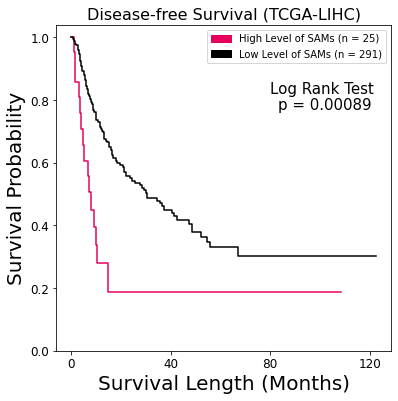

In [15]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#e6005c')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#e6005c',label='High Level of SAMs (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of SAMs (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.77, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Disease-free Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.DFS.pdf'%selected_cell,format='pdf')

In [16]:
os_data = survival_data.filter(['OS.time', 'OS'])
os_data = os_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
os_data['OS_E'] = [binary[event] for event in os_data['OS']]
os_data['OS_T'] = [time/30 for time in os_data['OS.time']]
os_data.head()

,OS.time,OS,OS_E,OS_T
sample,,,,
TCGA-2Y-A9GS-01,724.0,1,True,24.133333
TCGA-2Y-A9GT-01,1624.0,1,True,54.133333
TCGA-2Y-A9GU-01,1939.0,0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,1,True,84.400000
TCGA-2Y-A9GW-01,1271.0,1,True,42.366667


In [17]:
survival_test = estimation.merge(os_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Kupffer cells,TM1,SAMs,T cells,cDC2,cDC1,B cells,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-FV-A495-01,0.766988,0.023547,0.006748,0.148337,0.005788,0.019714,0.017748,0.011130,0,0.863320,0.512318,1.0,0,False,0.033333
TCGA-CC-A3MB-01,0.719061,0.009895,0.013096,0.100181,0.012556,0.082132,0.025423,0.037657,0,0.824934,0.574780,315.0,1,True,10.500000
TCGA-BC-A3KF-01,0.617540,0.103642,0.015847,0.061157,0.007262,0.133024,0.025164,0.036365,0,0.776250,0.635085,8.0,0,False,0.266667
TCGA-DD-A4NV-01,0.752746,0.000000,0.017130,0.101313,0.000000,0.073394,0.016744,0.038674,0,0.788129,0.618510,2398.0,0,False,79.933333
TCGA-CC-A1HT-01,0.419074,0.094199,0.078942,0.149734,0.034305,0.162842,0.008591,0.052312,0,0.718804,0.698507,101.0,1,True,3.366667


In [18]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

,Other,Kupffer cells,TM1,SAMs,T cells,cDC2,cDC1,B cells,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-DD-A3A6-01,0.059512,0.152470,0.000000,0.616937,0.098318,0.000000,0.020181,0.052582,0,0.519909,1.020289,3258.0,1,True,108.600000
TCGA-CC-A9FV-01,0.011555,0.257038,0.000000,0.473530,0.058282,0.126285,0.020865,0.052445,0,0.527216,1.035049,0.0,0,False,0.000000
TCGA-CC-A7IG-01,0.389629,0.076730,0.000506,0.412134,0.040041,0.004244,0.022589,0.054126,0,0.812005,0.584757,299.0,1,True,9.966667
TCGA-CC-A7II-01,0.311776,0.000000,0.000000,0.377727,0.110866,0.000000,0.056463,0.143167,0,0.273871,1.027283,399.0,0,False,13.300000
TCGA-ED-A7PX-01,0.421310,0.000000,0.001873,0.348996,0.040284,0.045131,0.043902,0.098504,0,0.680307,0.733683,6.0,0,False,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DD-AACO-01,0.760275,0.122026,0.030860,0.001120,0.025503,0.029018,0.008942,0.022255,0,0.818517,0.577601,1876.0,0,False,62.533333
TCGA-2Y-A9GZ-01,0.802320,0.010352,0.049156,0.001002,0.006416,0.116939,0.000000,0.013816,0,0.814409,0.583461,848.0,1,True,28.266667
TCGA-CC-5258-01,0.589408,0.158169,0.091053,0.000000,0.008405,0.054815,0.030748,0.067401,0,0.759800,0.652555,129.0,1,True,4.300000
TCGA-DD-A1EC-01,0.646840,0.046410,0.082674,0.000000,0.003517,0.177052,0.000000,0.043506,0,0.600365,0.803718,602.0,0,False,20.066667


In [19]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['OS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['OS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [24]:
#optimization = optimization.dropna()
#optimization = optimization.sort_values('Log Rank Test')
#optimization = int(optimization.iloc[0].name)
optimization = int(len(E)/2)

In [25]:
os_cut_level = survival_reorder[selected_cell][optimization]
os_cut_level

0.136792706001194

In [26]:
E = list(survival_reorder['OS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['OS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.17642

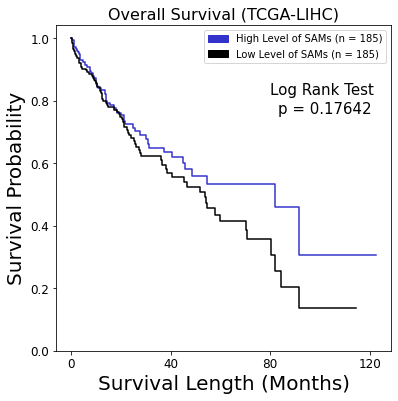

In [27]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#3333cc')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#3333cc',label='High Level of SAMs (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of SAMs (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.76, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Overall Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.OS.pdf'%selected_cell,format='pdf')

In [28]:
estimation = estimation.sort_values(selected_cell,ascending=False)
x = []
y = []
for key,value in enumerate(estimation[selected_cell]):
    x.append(key)
    y.append(value)

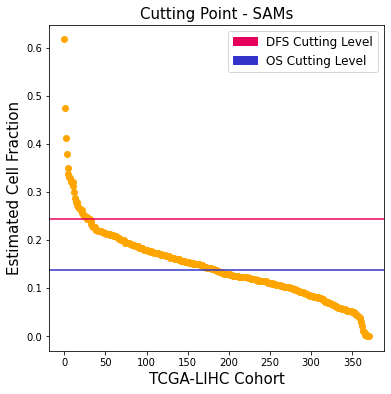

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,color='orange')
plt.axhline(y=os_cut_level, xmin=0, xmax=100,color='#3333cc')
plt.axhline(y=dfs_cut_level, xmin=0, xmax=100,color='#e6005c')
plt.ylabel('Estimated Cell Fraction',fontsize=15)
plt.xlabel('TCGA-LIHC Cohort',fontsize=15)
plt.title('Cutting Point - SAMs',fontsize=15)
dfs_patch = mpatches.Patch(color='#e6005c',label='DFS Cutting Level')
os_patch = mpatches.Patch(color='#3333cc',label='OS Cutting Level')
plt.legend(handles=[dfs_patch,os_patch],fontsize=12)
#plt.yscale("log")
plt.savefig('Cutting_Point.%s'%selected_cell,format='pdf')